In [ ]:
def david_hawkes(lambda_0, alpha, beta, T, i, t):
  k = 0
  lambda_star = lambda_0
  while k <= i:
    lambda_star = lambda_star + alpha*np.exp(-beta*(t - T[k]))
    k = k +1
  return lambda_star

## Hawkes Process from scratch

In [5]:
import pandas 
import numpy as np
import datetime

from bisect import bisect_left

alpha = 0.1
beta = 1
mu = 0.5

def instant_rate(t, x):
  """Computes instantenous intensity rate at arbitrary times x given trade times t. """
  reg = 0 
  idx = bisect_left(t, x)

  for j in reversed(range(0, idx)):
      d = np.array(x - t[0:idx])
      reg += alpha * np.sum(np.exp(-beta*d))
  return mu + reg

def rate_series(t, x):
  return [instant_rate(t, each) for each in x]

In [26]:
#read data
all_trades = pandas.read_csv('C:/Users/User/Desktop/git_repos/Hawkes-Process/case_studies/financial_case/data/all_trades.csv', parse_dates=[0], index_col=0)
usd_trades = all_trades[all_trades['d.currency'] == 'USD']

usd_counts = pandas.DataFrame({'counts': np.ones(len(usd_trades))}, index=usd_trades.index)
residuals = pandas.read_csv('C:/Users/User/Desktop/git_repos/Hawkes-Process/case_studies/financial_case/data/all_trades.csv', index_col=0)

In [27]:
empirical_1min = usd_counts.resample('1min', how='sum')
fitted = pandas.read_csv('C:/Users/User/Desktop/git_repos/Hawkes-Process/case_studies/financial_case/data/all_trades.csv', index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [31]:
index = map(lambda x: datetime.datetime.fromtimestamp(float(x)-3600), fitted.index)

In [32]:
# Index of series above. About 6.7 hours. In minutes thats 402 minutes.
# [2013-04-20 13:11:04, ..., 2013-04-20 19:57:04]
# 
empirical_1min = usd_counts.resample('1min', how='sum')

### read in fitted data from R and adjust index
fitted = pandas.read_csv('C:/Users/User/Desktop/git_repos/Hawkes-Process/case_studies/financial_case/data/all_trades.csv', index_col=0)
index = map(lambda x: datetime.datetime.fromtimestamp(float(x)-3600), fitted.index)

#fitted.index = index
#fitted_1min = fitted.resample('1min', how='sum')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  after removing the cwd from sys.path.


In [34]:
fitted.index = index

#fitted.index = index
#
#pandas.DataFrame({'fitted': fitted_1min.data.values, 'empirical': empirical_1min.counts.values}).plot()

ValueError: could not convert string to float: '2013-04-20 13:11:04'

In [21]:
fitted

,d.price_int,d.amount_int,d.type_str,d.currency,d.currency.1,d.item,d.properties
t,,,,,,,
2013-04-20 13:11:04,119.78849,0.9619855899999999,bid,USD,USD,NaN,limit
2013-04-20 13:11:04,119.78850,2.03801441,bid,USD,USD,NaN,limit
2013-04-20 13:11:19,119.78850,1,bid,USD,USD,NaN,limit
2013-04-20 13:13:11,119.78850,0.03021991,ask,USD,USD,NaN,market
2013-04-20 13:13:14,119.78850,0.01,ask,USD,USD,NaN,limit
...,...,...,...,...,...,...,...
2013-04-20 19:57:01,127.59999,0.12086499,bid,USD,USD,NaN,market
2013-04-20 19:57:01,127.60000,0.27523501,bid,USD,USD,NaN,market
2013-04-20 19:57:02,127.60000,2.2815,bid,USD,USD,NaN,market


In [ ]:

## plot settings
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', **{'sans-serif':'Verdana','family':'sans-serif','size':8})
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['axes.linewidth'] = 0.75

## simulated hawkes process
t =  [0.5, 1.1, 1.5, 1.8, 3.9, 7.2, 8.2, 8.8]
x = np.linspace(0, 10)

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x,rate_series(t, x))
ax.plot(t, [0.05]*len(t), '|', color='k')

ax.set_title('Simulated Arrival Intensity')
ax.set_xlabel('Time')
ax.set_ylabel('Intensity')

fig.tight_layout()

plt.draw()

## empirical trade counts
ax = empirical_1min.fillna(method='pad').plot()

ax.set_xlabel('Time')
ax.set_ylabel('Trades')
ax.set_title('Empirical trade counts')

plt.draw()


## empirical vs fitted
ax = pandas.DataFrame({'fitted': fitted_1min.data.values, 'empirical': empirical_1min.counts.values}).plot()

ax.set_ylabel('Intensity rate')
ax.set_xlabel('Time')
ax.set_title('Fitted vs Empirical Intensities')

plt.draw()
plt.show()

## QQ plot of residuals
import scipy.stats as stats
stats.probplot(residuals['residuals'].diff().dropna(), dist='expon', plot=plt, fit=True)

ax = plt.axes()
ax.set_title('Residual Interevent Times')

plt.draw()
plt.show()

39


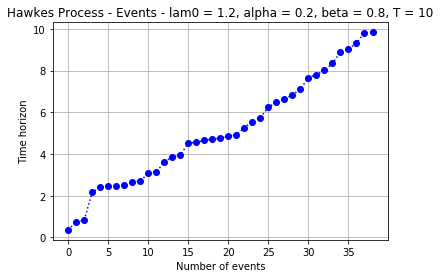

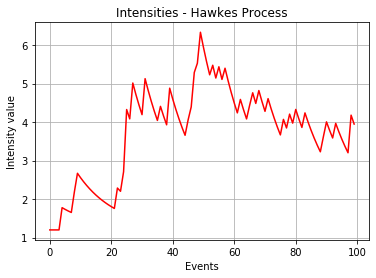

45


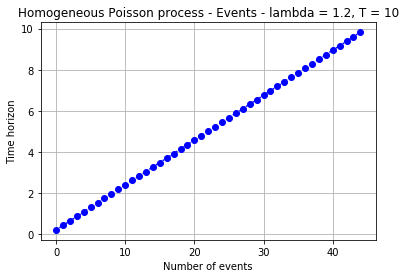

In [36]:

# Importing Packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import norm
import scipy.stats as stats
from datetime import timedelta

######################
## Hawkes Simulator ##
######################

### 1) A function for generating a Hawkes process.
##################################################

# Parameters: 
# lambda_0 = initial intensity
# alpha and beta : Kernel parameters.
# T = time horizon.

def hawkes_process(lambda0, alpha, beta, T):
    # Initialisation de la liste des temps.
    t = []
    # Initialisation de l'intensité.
    lambd = lambda0
    # Premier évènement.
    n = 1
    u = np.random.random()
    s = -np.log(u)/lambd
    if s <= T:
        t.append(s)
    else:
        return t
    # Main loop.
    n += 1
    lambd = lambda0
    # Update maximum intensity.
    for j in range(len(alpha)):
        lambd += alpha[j]
    # H = différence d'intensités.
    H = lambd - lambda0
    # Nouveau tirage
    u = np.random.random()
    s -= np.log(u)/lambd
    # La boucle.
    while s <= T:
        # Tirage d'une uniforme entre 0 et 1.
        d = np.random.random()
        H1 = H
        # Application du noyau
        for j in range(len(alpha)):
            H1 = H1*np.exp(-beta[j]*(s - t[-1]))
        lambdaS = lambda0 + H1
        # Principale condition.
        if d <= lambdaS/lambd:
            t.append(s)
            n += 1
            lamb = lambdaS
            H = H1
            for j in range(len(alpha)):
                lambd += alpha[j]
                H += alpha[j]
        else:
            lambd = lambdaS
        u = np.random.random()
        s -= np.log(u)/lambd
    return t


### 2) Functions for implementing the Kernel and get the intensity.
###################################################################

def kernel1D(alpha,beta,t):
    return alpha*np.exp(-beta*t)

def lambdaa(lamb0,alpha,beta,t,s):
    somme = lamb0
    for i in range(len(t)):
        if s >= t[i]:
            somme += kernel1D(alpha,beta,s-t[i])
        else:
            break
    return somme


### 3) Simulation of a Hawkes process : plots.
##############################################

# Simulating a Hawkes process.
t = hawkes_process(1.2,[0.6],[0.8],10)
print(len(t))

# Getting the associated intensities.
x = np.linspace(0,10,100)
l_y = []
for i in range(len(x)):
    l_y.append(lambdaa(1.2,0.6,0.8,t,x[i]))
    
plt.plot(t, 'b:o')
plt.title('Hawkes Process - Events - lam0 = 1.2, alpha = 0.2, beta = 0.8, T = 10')
plt.xlabel('Number of events')
plt.ylabel('Time horizon')
plt.grid(True)
plt.show()

plt.plot(l_y, color = 'red')
plt.title('Intensities - Hawkes Process')
plt.ylabel('Intensity value')
plt.xlabel('Events')
plt.grid(True)
plt.show()


###################################
## Poisson Homogeneous simulator ##
###################################

def poisson_simulator(lamb, T):
    time_list = []
    # Initial setting.
    t = 0
    i = 1
    # First random draw.
    u = np.random.random()
    s = - (1/lamb)*np.log(u)
    while t + s <= T:
        time = t + s
        t = t + s
        i += 1
        time_list.append(time)
    return time_list

a = poisson_simulator(1.2, 10)
print(len(a))
plt.plot(a, 'b:o')
plt.title('Homogeneous Poisson process - Events - lambda = 1.2, T = 10')
plt.xlabel('Number of events')
plt.ylabel('Time horizon')
plt.grid(True)
plt.show()
